In [33]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import ema_workbench
import seaborn as sns

In [14]:
from ema_workbench import load_results

experiments, outcomes = load_results('Week22_Open_exploration_PD_0.tar.gz')

In [15]:
df_exp = pd.DataFrame.from_dict(experiments)
df_out = pd.DataFrame.from_dict(outcomes)


In [16]:
df_out

,All Costs,Expected Number of Deaths
0,2.103390e+09,0.066514
1,1.761294e+09,0.000963
2,1.792195e+09,0.006017
3,1.756513e+09,0.000741
4,1.754577e+09,0.000781
...,...,...
995,1.210439e+09,0.000000
996,1.210439e+09,0.000000
997,1.811435e+09,0.069363
998,1.210439e+09,0.000000


In [17]:
df_tot = pd.concat([df_exp, df_out], axis=1)
df_tot

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model,All Costs,Expected Number of Deaths
0,8,278.405578,1.5,0.872290,291.885061,1.5,0.716958,167.882540,10.0,0.019372,...,7,8,5,7,4,10,0,dikesnet,2.103390e+09,0.066514
1,46,94.820196,1.5,0.502275,338.342179,10.0,0.398165,81.867211,1.5,0.966974,...,7,8,5,7,4,11,0,dikesnet,1.761294e+09,0.000963
2,111,118.913197,10.0,0.965798,198.212633,1.5,0.475785,332.309805,1.0,0.165428,...,7,8,5,7,4,12,0,dikesnet,1.792195e+09,0.006017
3,110,184.019252,1.0,0.989091,131.450547,1.0,0.652897,327.583099,10.0,0.401067,...,7,8,5,7,4,13,0,dikesnet,1.756513e+09,0.000741
4,91,76.344170,1.5,0.564976,271.809710,10.0,0.552502,37.660494,1.5,0.981007,...,7,8,5,7,4,14,0,dikesnet,1.754577e+09,0.000781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,95,193.846326,1.5,0.575513,126.602257,1.5,0.438043,160.916844,10.0,0.920118,...,4,5,1,6,2,105,9,dikesnet,1.210439e+09,0.000000
996,107,298.393492,1.0,0.695393,159.253526,1.0,0.129247,178.697219,1.0,0.079012,...,4,5,1,6,2,106,9,dikesnet,1.210439e+09,0.000000
997,3,227.343156,10.0,0.048210,64.302192,10.0,0.042440,201.048069,10.0,0.032441,...,4,5,1,6,2,107,9,dikesnet,1.811435e+09,0.069363
998,107,257.851430,10.0,0.274046,181.779586,1.5,0.601984,109.824018,10.0,0.225310,...,4,5,1,6,2,108,9,dikesnet,1.210439e+09,0.000000


In [18]:
## OPEN EXPLORATION 2 objective: Total COsts & Deaths 

In [19]:
#calcualte simple statistics most important outcomes
mean_deaths = df_tot['Expected Number of Deaths'].mean()
max_deaths = df_tot['Expected Number of Deaths'].max()
min_deaths = df_tot['Expected Number of Deaths'].min()
print('Mean Deaths:', mean_deaths)
print('Max Deaths:', max_deaths)
print('Min Deaths:', min_deaths)

mean_costs = df_tot['All Costs'].mean()
max_costs = df_tot['All Costs'].max()
min_costs = df_tot['All Costs'].min()
print('Mean Costs:', mean_costs)
print('Max Costs:', max_costs)
print('Min Costs:', min_costs)

Mean Deaths: 0.008729011731687686
Max Deaths: 0.3100717396967022
Min Deaths: 0.0
Mean Costs: 1813562577.4127653
Max Costs: 4577356462.375784
Min Costs: 1178367374.9767666


In [20]:
df_out_costs = df_tot[['All Costs']]
df_out_deaths = df_tot[['Expected Number of Deaths']]

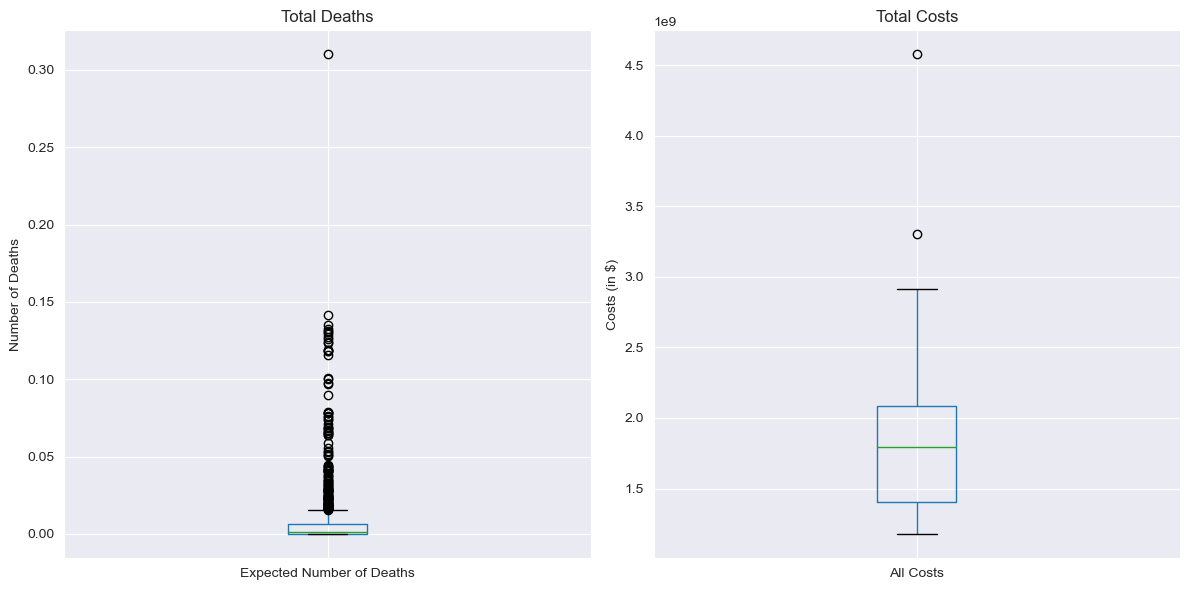

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot for df_out_deaths
df_out_deaths.boxplot(ax=axs[0])
axs[0].set_title('Total Deaths')
axs[0].set_ylabel('Number of Deaths')

# Boxplot for df_out_costs
df_out_costs.boxplot(ax=axs[1])
axs[1].set_title('Total Costs')
axs[1].set_ylabel('Costs (in $)')

# Display the boxplots
plt.tight_layout()
plt.show()

In [22]:
 #now create scatter plot of the outcomes of interest
results = load_results('Week22_Open_exploration_PD_0.tar.gz')

In [35]:
fig, axes = ema_workbench.analysis.pairs_plotting.pairs_scatter(results, group_by = 'policy', legend= False)

fig.set_figheight(15)
fig.set_figwidth(15)
plt.show

AttributeError: module 'ema_workbench' has no attribute 'pairs_plotting'

## OPEN exploration all objectives

In [37]:
experiments, outcomes = load_results('Week22_Open_exploration_PD5_100_25.gz')

In [38]:
data = {}
for k,v in outcomes.items():
    if len(v.shape)>1:
        v=v[:,-1]
    data[k] = v
data = pd.DataFrame.from_dict(data)

#calcualting correlations between the outcomes of interest
data.corr()

,A.1_Expected Annual Damage,A.1_Dike Investment Costs,A.1_Expected Number of Deaths,A.2_Expected Annual Damage,A.2_Dike Investment Costs,A.2_Expected Number of Deaths,A.3_Expected Annual Damage,A.3_Dike Investment Costs,A.3_Expected Number of Deaths,A.4_Expected Annual Damage,A.4_Dike Investment Costs,A.4_Expected Number of Deaths,A.5_Expected Annual Damage,A.5_Dike Investment Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
A.1_Expected Annual Damage,1.000000,-0.014134,1.000000,-0.001327,0.013689,-0.001216,-0.001435,0.005395,-0.001441,-0.001014,-0.018439,-0.001038,-0.002955,0.003814,-0.002914,-0.034803,-0.002744
A.1_Dike Investment Costs,-0.014134,1.000000,-0.014134,0.004899,-0.242824,0.000444,-0.049996,0.061080,-0.050224,-0.035827,0.129086,-0.036649,-0.002912,0.174553,-0.025232,-0.057491,-0.033966
A.1_Expected Number of Deaths,1.000000,-0.014134,1.000000,-0.001327,0.013689,-0.001216,-0.001435,0.005395,-0.001441,-0.001014,-0.018439,-0.001038,-0.002955,0.003814,-0.002914,-0.034803,-0.002744
A.2_Expected Annual Damage,-0.001327,0.004899,-0.001327,1.000000,-0.090813,0.973884,-0.004757,-0.108233,-0.004777,-0.003363,0.032496,-0.003440,-0.009799,0.012243,-0.009662,0.029248,0.072593
A.2_Dike Investment Costs,0.013689,-0.242824,0.013689,-0.090813,1.000000,-0.078919,0.017115,0.161525,0.017204,0.034699,-0.231331,0.035495,0.161303,0.009563,0.063350,0.057491,0.141079
A.2_Expected Number of Deaths,-0.001216,0.000444,-0.001216,0.973884,-0.078919,1.000000,-0.004360,-0.103404,-0.004379,-0.003083,0.028116,-0.003154,-0.008982,0.014837,-0.008857,0.025194,0.074617
A.3_Expected Annual Damage,-0.001435,-0.049996,-0.001435,-0.004757,0.017115,-0.004360,1.000000,-0.079434,0.980121,-0.003636,-0.136458,-0.003720,-0.010595,-0.029411,-0.010446,0.042395,0.634495
A.3_Dike Investment Costs,0.005395,0.061080,0.005395,-0.108233,0.161525,-0.103404,-0.079434,1.000000,-0.079774,0.013675,-0.072844,0.013988,-0.100473,-0.013669,-0.080992,-0.077025,-0.126506
A.3_Expected Number of Deaths,-0.001441,-0.050224,-0.001441,-0.004777,0.017204,-0.004379,0.980121,-0.079774,1.000000,-0.003652,-0.137081,-0.003735,-0.010639,-0.029551,-0.010490,0.042605,0.648734
A.4_Expected Annual Damage,-0.001014,-0.035827,-0.001014,-0.003363,0.034699,-0.003083,-0.003636,0.013675,-0.003652,1.000000,-0.046740,0.993050,-0.007491,0.009669,-0.007386,-0.088217,0.001572
